<a href="https://colab.research.google.com/github/jjooki/Dacon-Oil/blob/main/oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

base_path = '/content/drive/MyDrive/dacon/oil/'
load_path = base_path + 'data/'
save_path = base_path + 'submission/'

train = pd.read_csv(load_path + 'train.csv')
test = pd.read_csv(load_path + 'test.csv')
submission = pd.read_csv(load_path + 'sample_submission.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [ ]:
train

ID COMPONENT_ARBITRARY  ANONYMOUS_1  YEAR  \
0      TRAIN_00000          COMPONENT3         1486  2011   
1      TRAIN_00001          COMPONENT2         1350  2021   
2      TRAIN_00002          COMPONENT2         2415  2015   
3      TRAIN_00003          COMPONENT3         7389  2010   
4      TRAIN_00004          COMPONENT3         3954  2015   
...            ...                 ...          ...   ...   
14090  TRAIN_14090          COMPONENT3         1616  2014   
14091  TRAIN_14091          COMPONENT1         2784  2013   
14092  TRAIN_14092          COMPONENT3         1788  2008   
14093  TRAIN_14093          COMPONENT2         2498  2009   
14094  TRAIN_14094          COMPONENT2         1902  2012   

       SAMPLE_TRANSFER_DAY  ANONYMOUS_2  AG   AL    B  BA  ...     U25  \
0                        7          200   0    3   93   0  ...     NaN   
1                       51          375   0    2   19   0  ...     2.0   
2                        2          200   0  110    1   1  ...     0.0   
3                        2          200   0    8    3   0  ...     NaN   
4                        4          200   0    1  157   0  ...     NaN   
...                    ...          ...  ..  ...  ...  ..  ...     ...   
14090                    8          200   0    2  201   1  ...     NaN   
14091                    2          200   0    3   85   0  ...     NaN   
14092                    9          550   0    6    0   1  ...     NaN   
14093                   19          550   0    2    4   0  ...     7.0   
14094                   15          200   0    0   77   0  ...  1163.0   

          U20      U14        U6        U4  V  V100    V40    ZN  Y_LABEL  
0         NaN      NaN       NaN       NaN  0   NaN  154.0    75        0  
1         4.0      6.0     216.0    1454.0  0   NaN   44.0   652        0  
2         3.0     39.0   11261.0   41081.0  0   NaN   72.6   412        1  
3         NaN      NaN       NaN       NaN  0   NaN  133.3     7        0  
4         NaN      NaN       NaN       NaN  0   NaN  133.1   128        0  
...       ...      ...       ...       ... ..   ...    ...   ...      ...  
14090     NaN      NaN       NaN       NaN  0   NaN  135.4    16        0  
14091     NaN      NaN       NaN       NaN  0  14.5  117.5  1408        0  
14092     NaN      NaN       NaN       NaN  0   NaN   54.0  1301        0  
14093     8.0    100.0    1625.0   18890.0  0   NaN   44.3   652        0  
14094  2565.0  11296.0  181016.0  325823.0  0   NaN   47.0   612        0  

[14095 rows x 54 columns]

In [ ]:
test

ID COMPONENT_ARBITRARY  ANONYMOUS_1  YEAR  ANONYMOUS_2  AG  CO  \
0     TEST_0000          COMPONENT1         2192  2016          200   0   0   
1     TEST_0001          COMPONENT3         2794  2011          200   0   0   
2     TEST_0002          COMPONENT2         1982  2010          200   0   0   
3     TEST_0003          COMPONENT3         1404  2009          200   0   0   
4     TEST_0004          COMPONENT2         8225  2013          200   0   0   
...         ...                 ...          ...   ...          ...  ..  ..   
6036  TEST_6036          COMPONENT3         1714  2014          200   0   0   
6037  TEST_6037          COMPONENT3         4131  2016          200   0   0   
6038  TEST_6038          COMPONENT3         4325  2014          200   0   0   
6039  TEST_6039          COMPONENT2         1364  2013          200   0   0   
6040  TEST_6040          COMPONENT1         2397  2016         1597   1   0   

      CR   CU    FE  H2O  MN  MO  NI  PQINDEX  TI  V    V40    ZN  
0      0    1    12  0.0   0   0   0       10   0  0   91.3  1091  
1      2    1   278  0.0   3   0   0     2732   1  0  126.9    12  
2      0   16     5  0.0   0   0   0       11   0  0   44.3   714  
3      3    4   163  0.0   4   3   0     8007   0  0  142.8    94  
4      0    6    13  0.0   0   0   0       16   0  0   63.4   469  
...   ..  ...   ...  ...  ..  ..  ..      ...  .. ..    ...   ...  
6036   3  130  1047  0.0  65   5   2     1999   0  0   71.2  1163  
6037   5    2   736  0.0   5   0   0      693   0  0  137.8    13  
6038   0    0    53  0.0   0   0   0       69   0  0  302.2    13  
6039   0   62     2  0.0   0   0   0        5   0  0   51.1   478  
6040   0    0     4  0.0   0   2   0       14   0  0   80.0   970  

[6041 rows x 19 columns]

In [ ]:
submission

ID  Y_LABEL
0     TEST_0000        0
1     TEST_0001        0
2     TEST_0002        0
3     TEST_0003        0
4     TEST_0004        0
...         ...      ...
6036  TEST_6036        0
6037  TEST_6037        0
6038  TEST_6038        0
6039  TEST_6039        0
6040  TEST_6040        0

[6041 rows x 2 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

In [ ]:
print(train['COMPONENT_ARBITRARY'].unique())

['COMPONENT3' 'COMPONENT2' 'COMPONENT1' 'COMPONENT4']


In [ ]:
train.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

불량 개수 in train data set : 1203개
불량 비율 : 8.534941468605888%


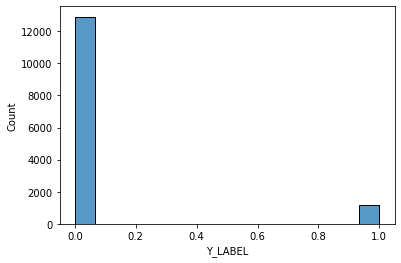

In [ ]:
sns.histplot(data=train, x='Y_LABEL')
print(f"불량 개수 in train data set : {len(train[train.Y_LABEL == 1])}개")
print(f"불량 비율 : {100 * len(train[train.Y_LABEL == 1]) / len(train)}%")

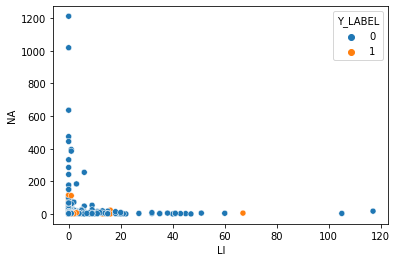

In [ ]:
sns.scatterplot(data=train, x='LI', y='NA', hue='Y_LABEL')

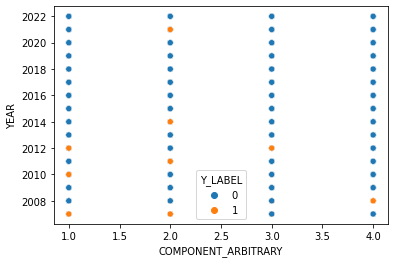

In [ ]:
train.COMPONENT_ARBITRARY = train.COMPONENT_ARBITRARY.map(component_dict)
sns.scatterplot(data=train, x='COMPONENT_ARBITRARY', y='YEAR', hue='Y_LABEL')

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


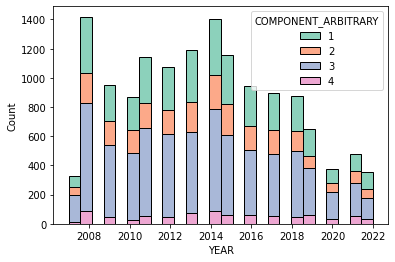

In [ ]:
print(sorted(train.YEAR.unique().tolist()))
sns.histplot(data=train, x='YEAR', hue='COMPONENT_ARBITRARY', multiple="stack", palette='Set2')

Component1의 전체 개수 in train data set : 3890개
Component1의 불량 개수 in train data set : 312개
Component1의 불량 비율 : 8.020565552699228%

Component2의 전체 개수 in train data set : 2316개
Component2의 불량 개수 in train data set : 206개
Component2의 불량 비율 : 8.894645941278066%

Component3의 전체 개수 in train data set : 7050개
Component3의 불량 개수 in train data set : 635개
Component3의 불량 비율 : 9.00709219858156%

Component4의 전체 개수 in train data set : 839개
Component4의 불량 개수 in train data set : 50개
Component4의 불량 비율 : 5.959475566150179%



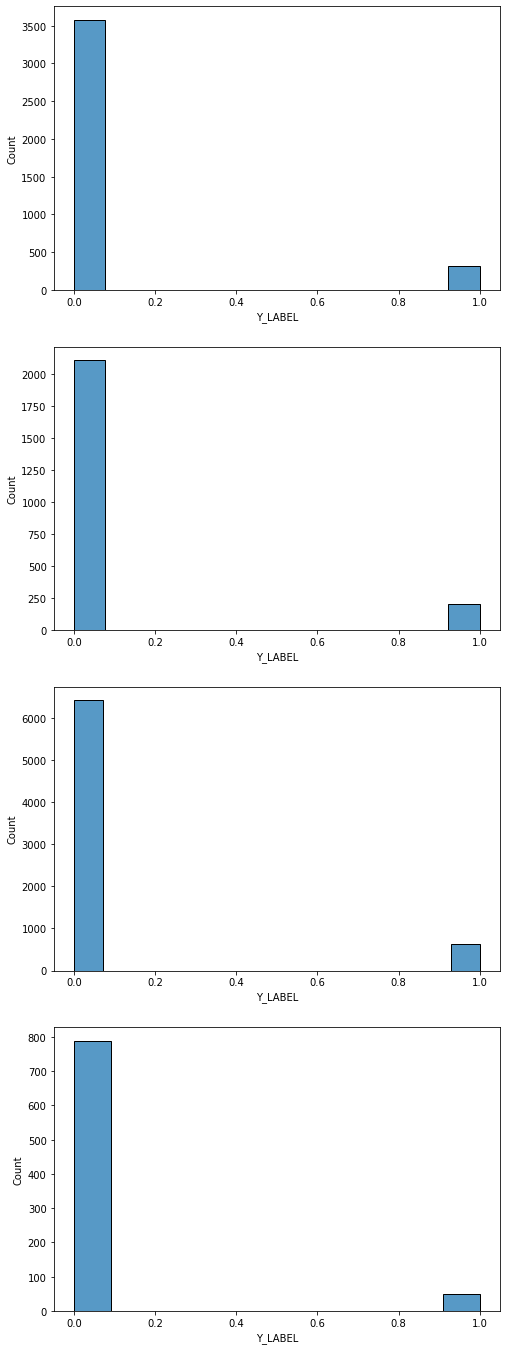

In [ ]:
_,ax = plt.subplots(4, 1, figsize=(8, 24))

for component in range(1, 5):
    temp = train[train.COMPONENT_ARBITRARY == component]
    sns.histplot(data=temp, x='Y_LABEL', ax=ax[component-1])
    print(f"Component{component}의 전체 개수 in train data set : {len(temp)}개")
    print(f"Component{component}의 불량 개수 in train data set : {len(temp[temp.Y_LABEL == 1])}개")
    print(f"Component{component}의 불량 비율 : {100 * len(temp[temp.Y_LABEL == 1]) / len(temp)}%")
    print()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

base_path = '/content/drive/MyDrive/dacon/oil/'
load_path = base_path + 'data/'
save_path = base_path + 'submission/'

train = pd.read_csv(load_path + 'train.csv')
test = pd.read_csv(load_path + 'test.csv')
submission = pd.read_csv(load_path + 'sample_submission.csv')

component_dict = {'COMPONENT3': 3, 'COMPONENT2': 2, 'COMPONENT1': 1, 'COMPONENT4': 4}
drop_col = ['ID', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
            'FTBN', 'FUEL', 'U100', 'U75', 'U50', 'U25', 'K', 'CD',
            'U20', 'U14', 'U6', 'U4', 'V100', 'SOOTPERCENTAGE'] # B, CA
# preprocessing
# def preprocessing(train, test, drop_col, component_dict):

train = train.drop(columns=drop_col)
test = test.drop(columns=['ID'])

train.COMPONENT_ARBITRARY = train.COMPONENT_ARBITRARY.map(component_dict)
test.COMPONENT_ARBITRARY = test.COMPONENT_ARBITRARY.map(component_dict)
train
# return train

COMPONENT_ARBITRARY  ANONYMOUS_1  YEAR  SAMPLE_TRANSFER_DAY  \
0                        3         1486  2011                    7   
1                        2         1350  2021                   51   
2                        2         2415  2015                    2   
3                        3         7389  2010                    2   
4                        3         3954  2015                    4   
...                    ...          ...   ...                  ...   
14090                    3         1616  2014                    8   
14091                    1         2784  2013                    2   
14092                    3         1788  2008                    9   
14093                    2         2498  2009                   19   
14094                    2         1902  2012                   15   

       ANONYMOUS_2  AG   AL    B  BA  BE  ...  PQINDEX      S  SB   SI  SN  \
0              200   0    3   93   0   0  ...     8504  21370   0  427   2   
1              375   0    2   19   0   0  ...       19   1117   0    0   0   
2              200   0  110    1   1   0  ...       17   1334   0    0   1   
3              200   0    8    3   0   0  ...       44  21774   2    1   1   
4              200   0    1  157   0   0  ...      217  18470   0    2   0   
...            ...  ..  ...  ...  ..  ..  ...      ...    ...  ..  ...  ..   
14090          200   0    2  201   1   0  ...       35  22000   0    2   0   
14091          200   0    3   85   0   0  ...        9   5494   0    5   0   
14092          550   0    6    0   1   0  ...      645   9640   2   18   0   
14093          550   0    2    4   0   0  ...       11   1313   0    0   0   
14094          200   0    0   77   0   0  ...       81   2057   0    6   0   

       TI  V    V40    ZN  Y_LABEL  
0       5  0  154.0    75        0  
1       0  0   44.0   652        0  
2       0  0   72.6   412        1  
3       0  0  133.3     7        0  
4       0  0  133.1   128        0  
...    .. ..    ...   ...      ...  
14090   0  0  135.4    16        0  
14091   0  0  117.5  1408        0  
14092   0  0   54.0  1301        0  
14093   0  0   44.3   652        0  
14094   2  0   47.0   612        0  

[14095 rows x 34 columns]

In [ ]:
test

COMPONENT_ARBITRARY  ANONYMOUS_1  YEAR  ANONYMOUS_2  AG  CO  CR   CU  \
0                       1         2192  2016          200   0   0   0    1   
1                       3         2794  2011          200   0   0   2    1   
2                       2         1982  2010          200   0   0   0   16   
3                       3         1404  2009          200   0   0   3    4   
4                       2         8225  2013          200   0   0   0    6   
...                   ...          ...   ...          ...  ..  ..  ..  ...   
6036                    3         1714  2014          200   0   0   3  130   
6037                    3         4131  2016          200   0   0   5    2   
6038                    3         4325  2014          200   0   0   0    0   
6039                    2         1364  2013          200   0   0   0   62   
6040                    1         2397  2016         1597   1   0   0    0   

        FE  H2O  MN  MO  NI  PQINDEX  TI  V    V40    ZN  
0       12  0.0   0   0   0       10   0  0   91.3  1091  
1      278  0.0   3   0   0     2732   1  0  126.9    12  
2        5  0.0   0   0   0       11   0  0   44.3   714  
3      163  0.0   4   3   0     8007   0  0  142.8    94  
4       13  0.0   0   0   0       16   0  0   63.4   469  
...    ...  ...  ..  ..  ..      ...  .. ..    ...   ...  
6036  1047  0.0  65   5   2     1999   0  0   71.2  1163  
6037   736  0.0   5   0   0      693   0  0  137.8    13  
6038    53  0.0   0   0   0       69   0  0  302.2    13  
6039     2  0.0   0   0   0        5   0  0   51.1   478  
6040     4  0.0   0   2   0       14   0  0   80.0   970  

[6041 rows x 18 columns]

In [ ]:
train

In [ ]:
train_cols = train.drop(columns='Y_LABEL').columns
test_cols = test.columns
resid_cols = list(set(train_cols) - set(test_cols))
print(len(train_cols))
print(len(test_cols))
print(resid_cols)

33
18
['PB', 'B', 'CA', 'SB', 'LI', 'NA', 'SAMPLE_TRANSFER_DAY', 'MG', 'SI', 'BA', 'S', 'P', 'SN', 'BE', 'AL']


# Solve Multicollinearity Problem for Regression

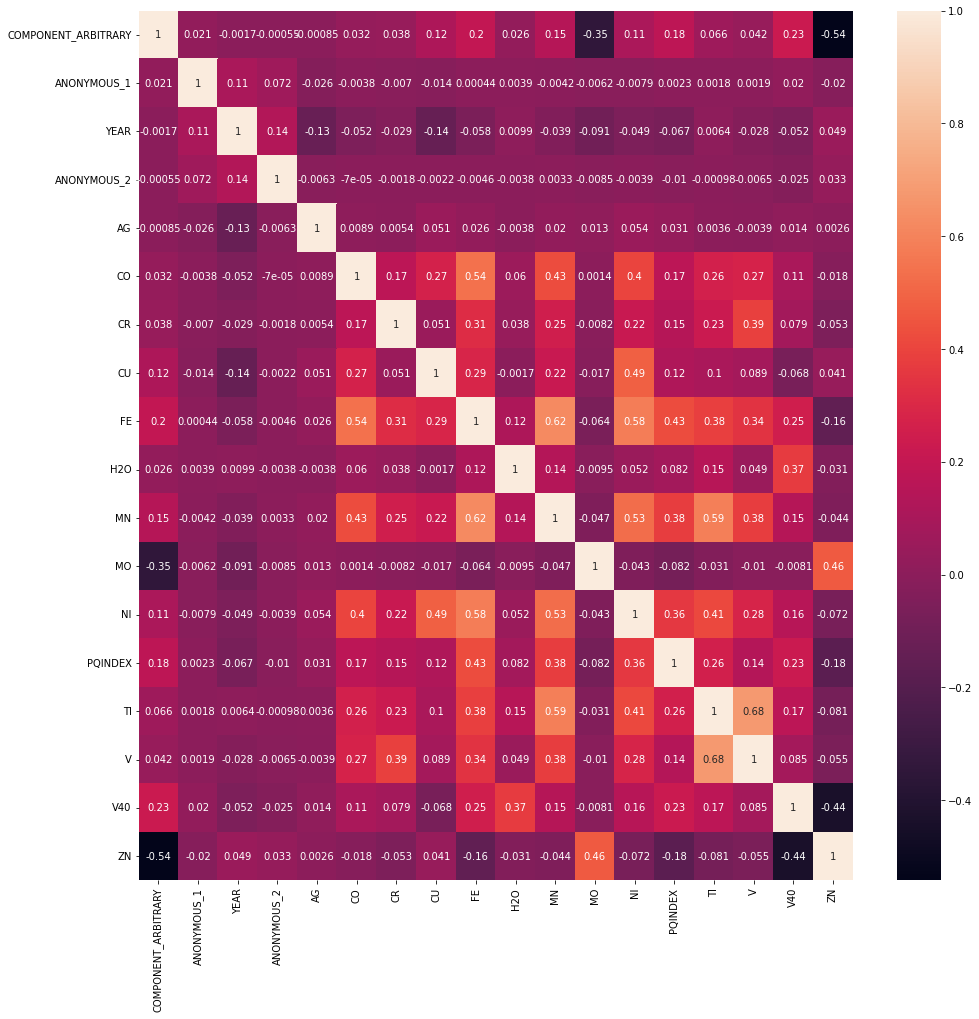

In [ ]:
corr = train[test_cols].corr()
plt.figure(figsize=(16, 16))
sns.heatmap(data=corr, annot=True)
plt.show()

### Threshold = 0.6
MN, FE

V, TI
### Threshold = 0.5

FE, CO

NI, FE

NI, MO

TI, MN

ZN, COMPONET_ARBITRARY

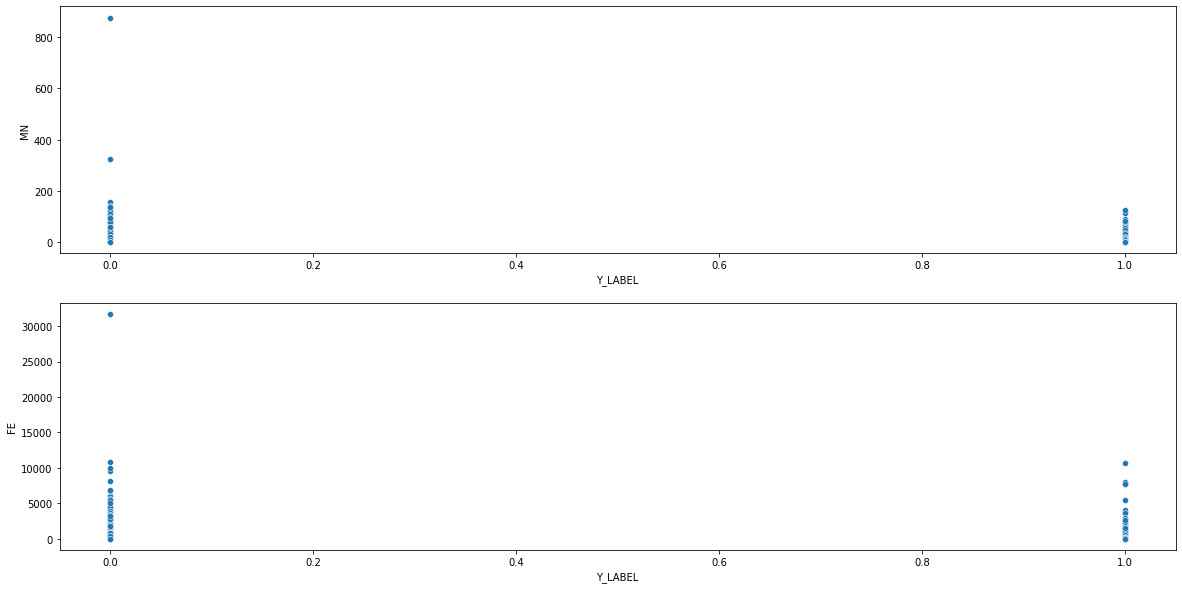

In [ ]:
# _, ax = plt.subplots(2, 1, figsize=(20, 10))
# sns.scatterplot(data=train, y='MN', x='Y_LABEL', ax=ax[0])
# sns.scatterplot(data=train, y='FE', x='Y_LABEL', ax=ax[1])
# plt.show()

In [ ]:
high_col60 = ['MN', 'V']
high_col50 = high_col60.extend(['FE', 'NI', 'ZN'])

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# metric
from sklearn.metrics import confusion_matrix, plot_roc_curve, f1_score

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost.sklearn import XGBClassifier

X = train.drop(columns=['Y_LABEL'])
y = train.Y_LABEL

In [ ]:
X = train.drop(columns=['Y_LABEL'])
y = train.Y_LABEL

ss = StandardScaler()
ss2 = StandardScaler()

X[X.columns] = ss.fit_transform(X[X.columns])
ss2.fit(train[test_cols])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
print(type(y_val))
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

<class 'pandas.core.series.Series'>
(10571, 33) (3524, 33) (10571,) (3524,)


In [ ]:
models = [LogisticRegression(random_state=42), 
          LinearSVC(random_state=42),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42), 
          XGBClassifier(random_state=42),
          LGBMClassifier(random_state=42)]

print(str(models[0]))

LogisticRegression(random_state=42)


In [ ]:
for model in models:
    name = str(model).split('(')[0]
    model.fit(X_train, y_train)
    predict = model.predict(X_val)
    
    print(f'---------- Model : {name} ----------')
    print('predict type is ', type(predict))
    print('F1 score is ', f1_score(y_val, predict))

---------- Model : LogisticRegression ----------
predict type is  <class 'numpy.ndarray'>
F1 score is  0.5986078886310905
---------- Model : LinearSVC ----------
predict type is  <class 'numpy.ndarray'>
F1 score is  0.6046511627906976
---------- Model : DecisionTreeClassifier ----------
predict type is  <class 'numpy.ndarray'>
F1 score is  0.5136054421768707
---------- Model : RandomForestClassifier ----------
predict type is  <class 'numpy.ndarray'>
F1 score is  0.6206896551724137
---------- Model : XGBClassifier ----------
predict type is  <class 'numpy.ndarray'>
F1 score is  0.6194690265486725
---------- Model : LGBMClassifier ----------
predict type is  <class 'numpy.ndarray'>
F1 score is  0.6311111111111111


In [ ]:
predict[0]

0

---------- Model : LogisticRegression ----------

F1 score is  0.602803738317757

---------- Model : LinearSVC ----------

F1 score is  0.602803738317757

---------- Model : DecisionTreeClassifier ----------

F1 score is  0.4950166112956811

---------- Model : RandomForestClassifier ----------

F1 score is  0.611111111111111

---------- Model : XGBClassifier ----------

F1 score is  0.6210045662100457

---------- Model : LGBMClassifier ----------

F1 score is  0.6261261261261261


In [ ]:
# for model in models:
#     name = str(model).split('(')[0]
#     model.fit(X2_train, y_train)
#     predict = model.predict(X2_val)
#     print(f'---------- Model : {name} ----------')
#     print('F1 score is ', f1_score(y_val, predict))

---------- Model : LogisticRegression ----------

F1 score is  0.013289036544850499

---------- Model : LinearSVC ----------

F1 score is  0.0

---------- Model : DecisionTreeClassifier ----------

F1 score is  0.13601236476043277

---------- Model : RandomForestClassifier ----------

F1 score is  0.039735099337748346

---------- Model : XGBClassifier ----------

F1 score is  0.020134228187919462

---------- Model : LGBMClassifier ----------

F1 score is  0.0379746835443038

In [ ]:
# regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor

# metrics
from sklearn.metrics import mean_absolute_error

X3 = X.drop(columns=resid_cols)
y_list = [X[col] for col in resid_cols]
final_models = []

for y, col in zip(y_list, resid_cols):
    errors = []
    models2 = [LinearRegression(),
               RandomForestRegressor(random_state=42),
               DecisionTreeRegressor(random_state=42),
               LGBMRegressor(random_state=42),
               XGBRegressor(random_state=42)]

    X3_train, X3_val, y_train, y_val = train_test_split(X3, y, test_size=0.25, random_state=42)

    print(f'---------- column : {col} ----------')
    print()

    for model in models2:
        name = str(model).split('(')[0]
        model.fit(X3_train, y_train)
        predict = model.predict(X3_val)
        mae = mean_absolute_error(y_val, predict)
        errors.append(mae)
        print(f'---------- Model : {name} ----------')
        print('MAE is ', mae)
        print()
    
    min_error_index = errors.index(min(errors))
    final_models.append(models2[min_error_index])

---------- column : BE ----------

---------- Model : LinearRegression ----------
MAE is  0.12484466569674085

---------- Model : RandomForestRegressor ----------
MAE is  0.11001408205538858

---------- Model : DecisionTreeRegressor ----------
MAE is  0.13611911847531116

---------- Model : LGBMRegressor ----------
MAE is  0.12741460570234933

[11:53:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
---------- Model : XGBRegressor ----------
MAE is  0.12069876703320132

---------- column : MG ----------

---------- Model : LinearRegression ----------
MAE is  0.382596866710295

---------- Model : RandomForestRegressor ----------
MAE is  0.22279730739420248

---------- Model : DecisionTreeRegressor ----------
MAE is  0.27171944712283336

---------- Model : LGBMRegressor ----------
MAE is  0.23424633771708908

[11:54:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
final_models

[RandomForestRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 XGBRegressor(random_state=42),
 XGBRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 XGBRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 XGBRegressor(random_state=42),
 XGBRegressor(random_state=42),
 RandomForestRegressor(random_state=42)]

In [ ]:
resid_cols

['BE',
 'MG',
 'S',
 'SAMPLE_TRANSFER_DAY',
 'AL',
 'NA',
 'SI',
 'PB',
 'LI',
 'P',
 'BA',
 'SB',
 'SN']

In [ ]:
test.dtypes

COMPONENT_ARBITRARY      int64
ANONYMOUS_1              int64
YEAR                     int64
ANONYMOUS_2              int64
AG                       int64
CO                       int64
CR                       int64
CU                       int64
FE                       int64
H2O                    float64
MN                       int64
MO                       int64
NI                       int64
PQINDEX                  int64
TI                       int64
V                        int64
V40                    float64
ZN                       int64
dtype: object

In [ ]:
test_num_cols = list(test.columns.values)
test_num_cols.remove('COMPONENT_ARBITRARY')
test_num_cols

['ANONYMOUS_1',
 'YEAR',
 'ANONYMOUS_2',
 'AG',
 'CO',
 'CR',
 'CU',
 'FE',
 'H2O',
 'MN',
 'MO',
 'NI',
 'PQINDEX',
 'TI',
 'V',
 'V40',
 'ZN']

In [ ]:
test[test_num_cols] = ss2.transform(test[test_num_cols])
test

COMPONENT_ARBITRARY  ANONYMOUS_1      YEAR  ANONYMOUS_2        AG  \
0                       0    -0.226304  0.592112    -0.340760 -0.150214   
1                       2    -0.083512 -0.669043    -0.340760 -0.150214   
2                       1    -0.276115 -0.921274    -0.340760 -0.150214   
3                       2    -0.413213 -1.173506    -0.340760 -0.150214   
4                       1     1.204694 -0.164581    -0.340760 -0.150214   
...                   ...          ...       ...          ...       ...   
6036                    2    -0.339683  0.087650    -0.340760 -0.150214   
6037                    2     0.233617  0.592112    -0.340760 -0.150214   
6038                    2     0.279633  0.087650    -0.340760 -0.150214   
6039                    1    -0.422701 -0.164581    -0.340760 -0.150214   
6040                    0    -0.177679  0.592112     2.199256  5.666438   

            CO        CR        CU        FE       H2O        MN        MO  \
0    -0.089633 -0.115388 -0.260252 -0.311651 -0.041588 -0.250456 -0.400998   
1    -0.089633 -0.045445 -0.260252  0.187233 -0.041588  0.019051 -0.400998   
2    -0.089633 -0.115388 -0.143932 -0.324780 -0.041588 -0.250456 -0.400998   
3    -0.089633 -0.010473 -0.236988 -0.028450 -0.041588  0.108886 -0.350857   
4    -0.089633 -0.115388 -0.221479 -0.309776 -0.041588 -0.250456 -0.400998   
...        ...       ...       ...       ...       ...       ...       ...   
6036 -0.089633 -0.010473  0.740102  1.629495 -0.041588  5.588859 -0.317430   
6037 -0.089633  0.059471 -0.252497  1.046214 -0.041588  0.198722 -0.400998   
6038 -0.089633 -0.115388 -0.268007 -0.234755 -0.041588 -0.250456 -0.400998   
6039 -0.089633 -0.115388  0.212784 -0.330406 -0.041588 -0.250456 -0.400998   
6040 -0.089633 -0.115388 -0.268007 -0.326655 -0.041588 -0.250456 -0.367571   

            NI   PQINDEX        TI        V       V40        ZN  
0    -0.191804 -0.265133 -0.102635 -0.10655 -0.363951  0.944762  
1    -0.191804  1.516121  0.042348 -0.10655  0.353638 -1.084484  
2    -0.191804 -0.264479 -0.102635 -0.10655 -1.311328  0.235748  
3    -0.191804  4.968037 -0.102635 -0.10655  0.674134 -0.930269  
4    -0.191804 -0.261207 -0.102635 -0.10655 -0.926330 -0.225017  
...        ...       ...       ...      ...       ...       ...  
6036  0.333602  1.036452 -0.102635 -0.10655 -0.769106  1.080171  
6037 -0.191804  0.181816 -0.102635 -0.10655  0.573349 -1.082603  
6038 -0.191804 -0.226524 -0.102635 -0.10655  3.887155 -1.082603  
6039 -0.191804 -0.268405 -0.102635 -0.10655 -1.174261 -0.208091  
6040 -0.191804 -0.262516 -0.102635 -0.10655 -0.591724  0.717201  

[6041 rows x 18 columns]

In [ ]:
test_cols = list(test.columns.values)

for model, col in zip(final_models, resid_cols):
    test[col] = model.predict(test[test_cols])

test

COMPONENT_ARBITRARY  ANONYMOUS_1      YEAR  ANONYMOUS_2        AG  \
0                       0    -0.226304  0.592112    -0.340760 -0.150214   
1                       2    -0.083512 -0.669043    -0.340760 -0.150214   
2                       1    -0.276115 -0.921274    -0.340760 -0.150214   
3                       2    -0.413213 -1.173506    -0.340760 -0.150214   
4                       1     1.204694 -0.164581    -0.340760 -0.150214   
...                   ...          ...       ...          ...       ...   
6036                    2    -0.339683  0.087650    -0.340760 -0.150214   
6037                    2     0.233617  0.592112    -0.340760 -0.150214   
6038                    2     0.279633  0.087650    -0.340760 -0.150214   
6039                    1    -0.422701 -0.164581    -0.340760 -0.150214   
6040                    0    -0.177679  0.592112     2.199256  5.666438   

            CO        CR        CU        FE       H2O  ...  \
0    -0.089633 -0.115388 -0.260252 -0.311651 -0.041588  ...   
1    -0.089633 -0.045445 -0.260252  0.187233 -0.041588  ...   
2    -0.089633 -0.115388 -0.143932 -0.324780 -0.041588  ...   
3    -0.089633 -0.010473 -0.236988 -0.028450 -0.041588  ...   
4    -0.089633 -0.115388 -0.221479 -0.309776 -0.041588  ...   
...        ...       ...       ...       ...       ...  ...   
6036 -0.089633 -0.010473  0.740102  1.629495 -0.041588  ...   
6037 -0.089633  0.059471 -0.252497  1.046214 -0.041588  ...   
6038 -0.089633 -0.115388 -0.268007 -0.234755 -0.041588  ...   
6039 -0.089633 -0.115388  0.212784 -0.330406 -0.041588  ...   
6040 -0.089633 -0.115388 -0.268007 -0.326655 -0.041588  ...   

      SAMPLE_TRANSFER_DAY        AL        NA        SI        PB        LI  \
0               -0.022271 -0.098585 -0.055054 -0.160751 -0.092005 -0.079745   
1               -0.033680  0.008289 -0.011512  0.151758 -0.152090  0.123594   
2                0.033654  0.093110 -0.208568 -0.161877 -0.069716 -0.051004   
3               -0.051253 -0.051029 -0.080175 -0.126654 -0.124955  0.128831   
4                1.903716  0.053604 -0.181773 -0.150051 -0.121079 -0.068743   
...                   ...       ...       ...       ...       ...       ...   
6036            -0.032802 -0.134713  0.681813 -0.046530 -0.063901  0.018882   
6037            -0.090317 -0.025106 -0.021002  0.018184 -0.146276  0.074837   
6038            -0.068849 -0.008002 -0.169492 -0.157321 -0.136584  0.016706   
6039             0.003581  0.022815 -0.187913 -0.172987 -0.114295 -0.021049   
6040             0.189340 -0.095626 -0.021560 -0.167816 -0.094913 -0.079745   

             P        BA        SB        SN  
0     0.033360 -0.171623 -0.152959 -0.130357  
1     0.080492 -0.168395 -0.100706 -0.249664  
2    -0.742020 -0.094751 -0.129268 -0.202496  
3     1.525699  0.191985  0.003421 -0.055443  
4    -0.952715 -0.156659 -0.129473 -0.249664  
...        ...       ...       ...       ...  
6036  0.257167 -0.101265 -0.091129  1.639826  
6037 -0.662993 -0.162537 -0.221113 -0.238566  
6038 -0.341413 -0.148001 -0.092363 -0.227467  
6039 -0.954327  0.224990 -0.152959 -0.216369  
6040  0.038941 -0.160909 -0.118262 -0.141455  

[6041 rows x 31 columns]

In [ ]:
submission.Y_LABEL = models[-1].predict(test)

In [ ]:
submission

ID  Y_LABEL
0     TEST_0000        0
1     TEST_0001        0
2     TEST_0002        0
3     TEST_0003        0
4     TEST_0004        0
...         ...      ...
6036  TEST_6036        0
6037  TEST_6037        0
6038  TEST_6038        0
6039  TEST_6039        0
6040  TEST_6040        0

[6041 rows x 2 columns]

In [ ]:
submission.to_csv('/content/drive/MyDrive/dacon/submission_oil2.csv', index=False)

# 모델 앙상블
1. 분류모델 후보군
- Random Forest
- LightGBM
- XGBoost
- CatBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# metric
from sklearn.metrics import confusion_matrix, plot_roc_curve, f1_score

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost.sklearn import XGBClassifier

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor

# metrics
from sklearn.metrics import mean_absolute_error

def reset_train():
    train = pd.read_csv('/content/drive/MyDrive/dacon/data/oil/train.csv')
    test = pd.read_csv('/content/drive/MyDrive/dacon/data/oil/test.csv')
    return train, test

def preprocessing(train):
    pass

def make_full_testset(X: pd.DataFrame, test: pd.DataFrame, encoder):
    if 'Y_LABEL' in X.columns:
        if 'ID' in X.columns:
            X = X.drop(columns=['ID', 'Y_LABEL'])
        else:
            X = X.drop(columns=['Y_LABEL'])
    else:
        if 'ID' in X.columns:
            X = X.drop(columns=['ID'])
    
    if 'ID' in test.columns:
        test = test.drop(columns=['ID'])

    train_cols = list(X.columns)
    test_cols = list(test.columns)
    resid_cols = list(set(train_cols) - set(test_cols))

    X2 = X.drop(columns=resid_cols)
    y_list = [X[col] for col in resid_cols]
    final_models = []

    for y, col in zip(y_list, resid_cols):
        errors = []
        models = [RandomForestRegressor(random_state=42),
                  DecisionTreeRegressor(random_state=42),
                  LGBMRegressor(random_state=42),
                  XGBRegressor(random_state=42)]

        X2_train, X2_val, y_train, y_val = train_test_split(X2, y, test_size=0.25, random_state=42)
        RandomForestRegressor()
        for model in models:
            name = str(model).split('(')[0]
            model.fit(X2_train, y_train)
            predict = model.predict(X3_val)
            mae = mean_absolute_error(y_val, predict)
            errors.append(mae)
        
        min_error_index = errors.index(min(errors))
        final_models.append(models[min_error_index])

    if 'COMPONENT_ARBITRARY' in test.columns:
        test['COMPONENT_ARBITRARY'] = encoder.transform(test['COMPONENT_ARBITRARY'])
        test_num_cols = list(test.columns.values)
        test_num_cols.remove('COMPONENT_ARBITRARY')

    ss = StandardScaler()
    ss.fit(X[test_num_cols])
    test[test_num_cols] = ss.transform(test[test_num_cols])


    for model, col in zip(final_models, resid_cols):
        test[col] = model.predict(test[test_cols])

    return test

def make_submission(model, X_test: pd.DataFrame, count: int):
    submission = pd.read_csv('/content/drive/MyDrive/dacon/data/oil/sample_submission.csv')

    submission.Y_LABEL = model.predict(X_test)
    submission.to_csv(f'/content/drive/MyDrive/dacon/submission_oil{count}.csv', index=False)

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 33.2 MB/s 
     |████████████████████████████████| 209 kB 92.9 MB/s 
     |████████████████████████████████| 81 kB 12.6 MB/s 
     |████████████████████████████████| 78 kB 9.0 MB/s 
     |████████████████████████████████| 112 kB 76.6 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 147 kB 77.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=9f609b34cddcfd40e770f816511fd64a66467c9b99139db254c18d612a01f409
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


# Main Point
## 1. Ensemble
## 2. Tuning
## 3. Class Imbalancing Problem -> Anomaly Detection

# Hyper-parameters
### 1. CART
- criterion : {“gini”, “entropy”, “log_loss”}, default=”gini”
- splitter  : {“best”, “random”}, default=”best”
- max_depth : int, default=None
- min_samples_split : int or float, default=2
- min_samples_leaf  : int or float, default=1
- min_weight_fraction_leaf : float, default=0.0
- max_features : int, float or {“auto”, “sqrt”, “log2”}, default=None
- random_state : int, RandomState instance or None, default=None
- max_leaf_nodes : int, default=None
- min_impurity_decrease : float, default=0.0
- class_weight : dict, list of dict or “balanced”, default=None
- ccp_alphanon-negative float, default=0.0

### 2. RF
- n_estimators : int, default=100
- criterion : {“gini”, “entropy”, “log_loss”}, default=”gini”
- max_depth : int, default=None
- min_samples_split : int or float, default=2
- min_samples_leaf  : int or float, default=1
- min_weight_fraction_leaf : float, default=0.0
- max_features : int, float or {“auto”, “sqrt”, “log2”}, default=None
- max_leaf_nodes : int, default=None
- min_impurity_decrease : float, default=0.0
- bootstrap : bool, default=True
- oob_score : bool, default=False
- n_jobs : int, default=None
- random_state : int, RandomState instance or None, default=None
- verbose : int, default=0
- warm_start : bool, default=False
- class_weight : {“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
- ccp_alpha : non-negative float, default=0.0
- max_samples : int or float, default=None

### 3. XGBoost
- n_estimators (int)
- max_depth (Optional[int])
- max_leaves
- max_bin
- grow_policy
- learning_rate
- verbosity
- objective
- booster
- tree_method
- n_jobs
- gamma
- min_child_weight
- max_delta_step
- subsample
- sampling_method
- colsample_bytree
- colsample_bylevel
- colsample_bynode
- reg_alpha
- reg_lambda
- scale_pos_weight
- base_score
- random_state
- missing
- num_parallel_tree 
- monotone_constraints
- interaction_constraints
- importance_type
- gpu_id
- validate_parameters
- predictor
- enable_categorical
- feature_types
- max_cat_to_onehot
- max_cat_threshold
- eval_metric
- early_stopping_rounds
- callbacks
- **kwargs

### 4. LightGBM
- boosting_type (str, optional (default='gbdt'))
- num_leaves (int, optional (default=31))
- max_depth (int, optional (default=-1))
- learning_rate (float, optional (default=0.1))
- n_estimators (int, optional (default=100))
- subsample_for_bin (int, optional (default=200000))
- objective (str, callable or None, optional (default=None))
- class_weight (dict, 'balanced' or None, optional (default=None))
- min_split_gain (float, optional (default=0.))
- min_child_weight (float, optional (default=1e-3))
- min_child_samples (int, optional (default=20))
- subsample (float, optional (default=1.))
- subsample_freq (int, optional (default=0))
- colsample_bytree (float, optional (default=1.))
- reg_alpha (float, optional (default=0.))
- reg_lambda (float, optional (default=0.))
- random_state (int, RandomState object or None, optional (default=None))
- n_jobs (int, optional (default=-1))
- silent (bool, optional (default=True))
- importance_type (str, optional (default='split'))
- **kwargs

In [ ]:
!pip install optuna
!pip install xgboost==1.6.0
!pip install lightgbm==3.3.2
!pip install overrides

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 8.5 MB/s 
     |████████████████████████████████| 209 kB 69.7 MB/s 
     |████████████████████████████████| 81 kB 10.9 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 147 kB 48.1 MB/s 
     |████████████████████████████████| 112 kB 69.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=aa001b59f02af4b99694e1db600c4a15a41ace467717d6ce1f813e98bd8bc77e
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
!pip3 -V

pip 22.2.1 from C:\Users\piy81\AppData\Roaming\Python\Python38\site-packages\pip (python 3.8)



In [ ]:
!pip install overrides

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
corr_threshold = [0.3, 0.4, 0.5, 0.6, 0.7]
feature_importance_threshold = [0.001, 0.002, 0.005, 0.01, 0.02]

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

metric = f1_score
print(metric(np.array([1, 0]), np.array([1, 1])))

0.6666666666666666


In [ ]:
m1 =[RandomForestClassifier, XGBClassifier, LGBMClassifier]
m2 =[RandomForestClassifier(), XGBClassifier(), LGBMClassifier()]

In [ ]:
model = m1[0](**param)
model

RandomForestClassifier()

In [ ]:
m2[0]

RandomForestClassifier()

In [ ]:
fd = {'a': 0, 'b': 1}
temp = fd
fd2 = {'b': 2, 'c': 3}
temp.update(fd2)
print(temp)
print(fd)

{'a': 0, 'b': 2, 'c': 3}
{'a': 0, 'b': 2, 'c': 3}


In [ ]:
y = pd.DataFrame()

In [ ]:
type(y) == pd.DataFrame

True

In [ ]:
x = np.array([1,2,3,4])
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(4,)


In [ ]:
n = 1
# x+y+z = 5인 음이 아닌 정수 (x, y, z) 순서쌍 만들기
weights = []
for i in range(n+1):
    for j in range(n+1-i):
        k = n-i-j
        temp = [i/n, j/n, k/n]
        weights.append(temp)
print(weights)

[[0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]]


In [ ]:
m1 = RandomForestClassifier()
m2 = XGBClassifier()
m3 = LGBMClassifier()

kwarg = {
    'estimators' : [('rf', m1), ('xgb', m2), ('lgbm', m3)],
    'voting': 'soft'
}

vc = VotingClassifier(**kwarg)

grid_params = {'weights': weights}
grid_Search = GridSearchCV(param_grid = grid_params, estimator=vc, scoring=f1_score)
grid_Search.fit(X, y)
print(grid_Search.best_estimator_)
# kwarg.update(grid_Search.best_estimator_)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb', XGBClassifier()),
                             ('lgbm', LGBMClassifier())],
                 voting='soft', weights=[0.0, 0.0, 1.0])


In [ ]:
vc = grid_Search.best_estimator_
pred = vc.predict(X)
print('F1 Score : ', f1_score(y, pred))

F1 Score :  0.8634860651865848


In [ ]:
def make_X_y():
    X = [[0,1],[2,3]]
    y = [5,6]
    return X, y
type(make_X_y())

tuple

In [4]:
data = {
    'ab' : (10, 20),
    'cd' : (30, 40)
}

for key, (X, y) in data.items():
    print(key)
    print(X)
    print(y)

ab
10
20
cd
30
40


In [12]:
sampler = RandomUnderSampler()
X, y = sampler.fit_resample(X, y)


tuple

In [13]:
X

COMPONENT_ARBITRARY  ANONYMOUS_1  YEAR  SAMPLE_TRANSFER_DAY  \
0                       2         3029  2017                   11   
1                       1         3928  2012                    7   
2                       3         1690  2011                    7   
3                       3         1466  2012                    2   
4                       3         1994  2009                    5   
...                   ...          ...   ...                  ...   
2401                    3         7789  2012                    4   
2402                    3         3060  2010                    2   
2403                    1         2036  2010                    5   
2404                    3         1637  2008                   16   
2405                    2         1552  2007                    5   

      ANONYMOUS_2  AG  AL    B  BA  BE  ...  PB  PQINDEX      S  SB  SI  SN  \
0            2650   0   3   94   0   0  ...   2       18   5674   1  13   1   
1             200   0   0    2   0   0  ...   1       23   6726   0  11   0   
2             200   0   2   18   0   0  ...   0       53  12380   0   3   0   
3             270   0   7  372   1   0  ...   0      545  11220   0  11   0   
4             200   1   8    1   7   0  ...   0      139  26709   0   1   0   
...           ...  ..  ..  ...  ..  ..  ...  ..      ...    ...  ..  ..  ..   
2401          200   0   3   41   3   0  ...   0       19  21620   0   2   0   
2402          200   0   2    3   0   0  ...   0      522  26960   0   4   0   
2403          200   0  37    6   1   0  ...   2       12   3836   0   8   0   
2404          487   0  11   99   2   0  ...   0      102  25640   0   2   1   
2405          375   0   4  111   0   0  ...   0       35   6569   3   1   0   

      TI  V    V40    ZN  
0      0  0   43.0  1354  
1      0  0   93.7  1142  
2      0  0  162.1    17  
3      0  0   70.8  1300  
4      0  0  147.5    47  
...   .. ..    ...   ...  
2401   0  0  130.6    16  
2402   0  0  140.0    35  
2403   0  0  129.1  1045  
2404   0  0  152.6    21  
2405   0  0   59.8   395  

[2406 rows x 33 columns]

In [14]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2401    1
2402    1
2403    1
2404    1
2405    1
Name: Y_LABEL, Length: 2406, dtype: int64

## Modeling process
1. Load data and library(module)

2. EDA

3. Preprocessing & Feature Engineering

4. Check class imbalance & Train data split

5. Train

6. Hyper-parameter tuning

7. Evaluation

In [5]:
!pip install optuna
!pip install xgboost==1.6.0
!pip install lightgbm==3.3.2
!pip install overrides

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.3 MB/s 
     |████████████████████████████████| 81 kB 8.9 MB/s 
     |████████████████████████████████| 209 kB 49.2 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 112 kB 59.7 MB/s 
     |████████████████████████████████| 147 kB 42.3 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=ccf3ec369359db475beef01ada43d293d07f346c0a2e608a44d7c035b3059d9b
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193.7 MB 32 kB/s 
  Attempting uninstall: xgboost
    Found existing in

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from overrides import overrides
import copy
import os
import warnings
warnings.filterwarnings(action='ignore')

# 상관관계 분석, VIF : 다중공선성 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost.sklearn import XGBClassifier

# classification metrics
from sklearn.metrics import confusion_matrix, plot_roc_curve, f1_score

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor

# regression metrics
from sklearn.metrics import mean_absolute_error, r2_score

# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold, StratifiedKFold
from functools import partial

# optimize : hyper-parameter tuning
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

# modules for calss imbalance problem
from sklearn.decomposition import PCA # 차원축소
from sklearn.metrics import classification_report # 성과지표
from imblearn.under_sampling import * # 임벨런스
from imblearn.over_sampling import * # 임벨런스
from imblearn.combine import * # 임벨런스
from imblearn.pipeline import Pipeline # 파이프라인구축

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class oil:
    def __init__(self, train, test):
        base_path = '/content/drive/MyDrive/dacon/oil/'
        self.load_path = base_path + 'data/'
        self.save_path = base_path + 'submission/'
        self.train = pd.read_csv(self.load_path + 'train.csv')
        self.test = pd.read_csv(self.load_path + 'test.csv')
        self.submission = pd.read_csv(self.load_path + 'sample_submission.csv')
    
    def make_X_y(self) -> None:
        self.X = self.train.drop(columns=['ID', 'Y_LABEL'])
        self.y = self.train.Y_LABEL
        self.test = self.test.drop(columns=['ID'])

    def reset_data(self, mode: str=None):
        if mode is None:
            self.train = pd.read_csv(self.load_path + 'train.csv')
            self.test = pd.read_csv(self.load_path + 'test.csv')
        elif mode == 'train':
            self.train = pd.read_csv(self.load_path + 'train.csv')
        elif mode == 'test':
            self.test = pd.read_csv(self.load_path + 'test.csv')

    def split(self, X, y):
        return train_test_split(X, y, test_size=0.25, random_state=42)

    def multilinearity(self, threshold: float|list=0.7):
        pass
    
    def feature_importance_remove(self, threshold: float|list=0.01):
        pass
    
    def drop_columns(self, columns):
        try:
            if type(columns) == list:
                for col in columns:
                    if col in self.X_test.columns:
                        self.X = self.X.drop(columns=[col])
                        self.X_test = self.X_test.drop(columns=[col])
                    else:
                        self.X = self.X.drop(columns=[col])

            elif type(columns) == str:
                if col in self.X_test.columns:
                    self.X = self.X.drop(columns=[columns])
                    self.X_test = self.X_test.drop(columns=[columns])
                else:
                    self.X = self.X.drop(columns=[columns])
        except:
            print("Not exist those columns. Don't do that")
                
    def modeling(self):
        """
        feature_importance 제거를 위한 기본 모델
        """
        pass

    def grouping(self, categorical_feature: str='COMPONENT_ARBITRARY') -> dict:
        group = {}
        for criteria in self.train[categorical_feature].unique():
            print(f"dividing my df on {criteria}")
            temp_df = self.train.loc[self.train[categorical_feature] == criteria, :].drop(columns=categorical_feature)
            group.update({criteria: temp_df})
        
        return group

    def sampling(self, X, y, sampling_mode: str='under', sampler_type: str='RandomUnderSampler'):
        """
        Parameters
        sampling_mode :
        - 'under' : undersampling(default)
        - 'over' : oversampling
        - 'hybrid' : under + over
        """
        sampling_method_info = pd.DataFrame(
            {"under" : [RandomUnderSampler(),
                        TomekLinks(),
                        CondensedNearestNeighbour(), 
                        OneSidedSelection(),
                        EditedNearestNeighbours(),
                        NeighbourhoodCleaningRule()],

            "over" : [RandomOverSampler(),
                      ADASYN(),
                      NeighbourhoodCleaningRule(),
                      None,
                      None,
                      None],

            "hybrid" : [SMOTEENN(),
                        SMOTETomek(),
                        None,
                        None,
                        None,
                        None]
            }
        )

        self.samplers = {
            "under" : {
                'RandomUnderSampler': RandomUnderSampler(),
                'TomekLinks': TomekLinks(),
                'CondensedNearestNeighbour': CondensedNearestNeighbour(), 
                'OneSidedSelection': OneSidedSelection(),
                'EditedNearestNeighbours': EditedNearestNeighbours(),
                'NeighbourhoodCleaningRule': NeighbourhoodCleaningRule()
            },

            "over" : {
                'RandomOverSampler': RandomOverSampler(),
                'ADASYN': ADASYN(),
                'NeighbourhoodCleaningRule': NeighbourhoodCleaningRule()
            },

            "hybrid" : {
                'SMOTEENN': SMOTEENN(),
                'SMOTETomek': SMOTETomek()
            }
        }

        X2, y2 = sampling_method_info[sampling_mode][sampler_type].fit_resample(X, y)
        return X2, y2
    
    def report(X: pd.DataFrame, y: pd.DataFrame, sampling_method: callable = None, dimensionality: callable = None, model: callable = None) -> str: 
        """
        사용법:
        pca = PCA()
        rfc = RandomForestClassifier()
        rmu = RandomUnderSampler()
        pipine(rmu, pca, rfc)
        """
        pipeline = Pipeline([('sampling_method', sampling_method), ('dimensionality', dimensionality), ('model', model)]) # sampling method, dimensionality, model
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        pipeline.fit(X_train, y_train) 
        y_hat = pipeline.predict(X_test)
        #print(type(classification_report(y_test, y_hat)))
        return classification_report(y_test, y_hat)

    def data_split(self):
        pass

    def make_full_testset(self, encoder):
        train_cols = list(X.columns)
        test_cols = list(test.columns)
        resid_cols = list(set(train_cols) - set(test_cols))

        self.X2 = X.drop(columns=resid_cols)
        y_list = [X[col] for col in resid_cols]
        final_models = []

        for y, col in zip(y_list, resid_cols):
            errors = []
            # set the weak(?) leaners
            models = [RandomForestRegressor(random_state=42),
                      DecisionTreeRegressor(random_state=42),
                      LGBMRegressor(random_state=42),
                      XGBRegressor(random_state=42)]

            X2_train, X2_val, y_train, y_val = train_test_split(self.X2, y, test_size=0.25, random_state=42)

            for model in models:
                name = str(model).split('(')[0]
                model.fit(X2_train, y_train)
                predict = model.predict(X3_val)
                mae = mean_absolute_error(y_val, predict)
                errors.append(mae)
            
            min_error_index = errors.index(min(errors))
            final_models.append(models[min_error_index])

        if 'COMPONENT_ARBITRARY' in test.columns:
            test['COMPONENT_ARBITRARY'] = encoder.transform(test['COMPONENT_ARBITRARY'])
            test_num_cols = list(test.columns.values)
            test_num_cols.remove('COMPONENT_ARBITRARY')

        ss = StandardScaler()
        ss.fit(X[test_num_cols])
        test[test_num_cols] = ss.transform(test[test_num_cols])

        for model, col in zip(final_models, resid_cols):
            test[col] = model.predict(test[test_cols])

        return test

    def make_submission(self, test: pd.DataFrame):
        # Check submission file name and define file name
        if 'submission_bike.csv' in os.listdir(self.save_path):
            count = 0
            for name in os.listdir(self.save_path):
                if 'submission_bike' in name:
                    count += 1
            filename = f"submission_bike{count + 1}.csv"
        else:
            filename = 'submission_bike.csv'

        # Export submission file
        self.submission.Y_LABEL = self.main_model.predict(test)
        self.submission.to_csv(self.save_path + filename, index=False)

# ---------------------------------------------------------------------------- #
#          Make Sampling Pipeline for solving class imbalance problem          #
# ---------------------------------------------------------------------------- #

    def random_forest_call(self, split_data) :
        """
        main use will be supplement function for classifier_with_group
        """
        classifier_without_dic = RandomForestClassifier()  # Random Forest 분류기 불러오기
        acc_dic = {}
        for criteria, (X_train, X_test, y_train, y_test) in split_data.items() : 
            classifier_without_dic.fit(X_train, y_train) # Random Forest 학습을 위해 parameter 채우기
            pred = classifier_without_dic.predict(X_test) # Random Forest 테스트를 위해 parameter 채우기
            acc = f1_score(y_test, pred)  # f1_score 계산
            acc_dic[f"{criteria}"] = acc
            #print(classification_report(tuple_dic[2], pred))
            print("f1_score : %.3f" % acc)

        return classifier_without_dic, acc_dic

    def classifier_with_group(self, classifier, dic) : 
        """
        return list that contains all classifier for each group 
        """
        classifier_list = []
        for key in dic : 
            df = dic[key]
            classifier_with_group = self.random_forest_call(X_train = df[0], y_train = df[2], X_test = df[1], y_test = df[3])
            classifier_list.append(classifier_with_group)
        return classifier_list

# ---------------------------------------------------------------------------- #
#                 Make Model Pipeline for the multiple tests                   #
# ---------------------------------------------------------------------------- #

class Ensemble:
    """
    Ensemble & Optimize 3 models(RandomForest, XGBoost, LightGBM)
    - (model_type : Classifier / Regressor) Ensemble with (ensemble : Voting / Stacking)
    """
    def __init__(self, ensemble: str):
        """
        ensemble : 'Voting', 'Stacking'
        """
        self.final_ensemble = None        # Final Ensemble model
        self.models = {
            'RF': None,
            'XGB': None,
            'LGBM': None
        }
        
        # self.metric[self.type_]
        self.metric = {
            'classification' : f1_score,
            'regression' : r2_score
        }

        # Initializing hyper-parameter for each model
        # self.param[self.learner_]
        self.param = {
            'RF' : {'learning_rate': 0.001,
                    'n_jobs': -1,
                    'random_state': 42},

            'XGB' : {'learning_rate': 0.001,
                     'nthread' : -1,
                     'n_jobs': -1,
                     'tree_method': 'gpu_hist',
                     'predictor': 'gpu_predictor',
                     'random_state': 42,
                     'verbosity': 0},
                      
            'LGBM' : {'learning_rate': 0.001,
                      'n_jobs': -1,
                      'random_state': 42}
        }

        # self.learners[self.type_][self.learner_]
        self.learners = {
            'classification' : {
                'RF': RandomForestClassifier,
                'XGB': XGBClassifier,
                'LGBM': LGBMClassifier
            },
            
            'regression' : {
                'RF': RandomForestRegressor,
                'XGB': XGBRegressor,
                'LGBM': LGBMRegressor
            }
        }

        # self.voters[self.type_][self.emsemble_]
        self.voters = {
            'classification' : {
                'voting' : VotingClassifier,
                'stacking' : StackingClassifier
            },
            
            'regression' : {
                'voting' : VotingRegressor,
                'stacking' : StackingRegressor
            }
        }

        # 'classification' , 'regression'
        self.type_ = ''
        self.learner_ = ['RF', 'XGB', 'LGBM']
        self.ensemble_ = ensemble if ensemble in ['Voting', 'Stacking'] else 'Voting'

    def make_weights(self, N: int) -> list:
        # x+y+z = 5인 음이 아닌 정수 (x, y, z) 순서쌍 만들기
        weights = []
        for i in range(N+1):
            for j in range(N+1-i):
                k = N-i-j
                temp = [i/N, j/N, k/N]
                weights.append(temp)
        return weights
        
    def fit(self, X_train: pd.DataFrame, y_train: pd.Series | np.ndarray) -> None:
        for learner in self.learner_: 
            # RF, XGB, LGBM 순서대로 hyper-parameter tuning
            param = self.optimizer(X_train, y_train, learner, 250)
            # Hyper-parameter fix + tuning
            self.param[learner].update(param)
            # Set up final models
            self.models[learner] = self.learners[self.type_][learner](**self.param[learner])
        
        estimators = [(learner, self.models[learner]) for learner in self.learner_]
        weights = self.make_weights(N=5)
        
        # 'weights': weights,
        ensemble_param = {
            'estimators': estimators,
            'n_jobs': -1
        }
        if self.ensemble_ == 'Voting':
            ensemble_param.update({'voting': 'soft'})
        
        self.final_ensemble = self.voters[self.type_][self.ensemle_](**ensemble_param)

        grid_params = {'weights': weights}
        grid_Search = GridSearchCV(param_grid = grid_params, estimator=self.final_ensemble, scoring=self.metric)
        grid_Search.fit(X_train, y_train)
        self.final_ensemble = grid_Search.best_estimator_

    def predict(self, X_test: pd.DataFrame) -> np.ndarray:
        return self.final_ensemble.predict(X_test)

    def score(self, y_test: pd.Series | np.ndarray, y_pred: pd.Series | np.ndarray) -> float:
        return self.metric[self.type_](y_test, y_pred)

    def K_fold(self, model, X, y, K) -> list:
        scores = []
        folds = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
        
        if K == 1:
            pass
        else:
            for train_idx, val_idx in folds.split(X, y):
                X_train = X.iloc[train_idx, :]
                y_train = y.iloc[train_idx]
                
                X_val = X.iloc[val_idx, :]
                y_val = y.iloc[val_idx]
                
                model.fit(X_train, y_train, verbose=False)
                score = self.metric[self.type_](y_val, model.predict(X_val))
                scores.append(score)

        return scores

    def objective(self, trial: Trial, X, y, learner: str, K: int=5) -> float:
        temp = copy.deepcopy(self.param[learner])
        
        if learner == 'RF': # RandomForest
            param = {
                "n_estimators" : trial.suggest_int('n_estimators', 500, 4000),
                'max_depth':trial.suggest_int('max_depth', 8, 16),
                'learning_rate': 0.05
            }

        elif learner == 'XGB': # XGB
            param = {
                "n_estimators" : trial.suggest_int('n_estimators', 500, 4000),
                'max_depth':trial.suggest_int('max_depth', 8, 16),
                'min_child_weight':trial.suggest_int('min_child_weight', 1, 300),
                'gamma':trial.suggest_int('gamma', 1, 3),
                'learning_rate': 0.05,
                'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.5, 1, 0.1),
                'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
                'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
                'subsample': trial.suggest_categorical('subsample', [0.6,0.7,0.8,1.0] )
            }

        elif learner == 'LGBM': # LGBM
            param = {
                'num_leaves': trial.suggest_int('num_leaves', 2, 1024, step=1, log=True), 
                'max_depth': trial.suggest_int('max_depth', 1, 10, step=1, log=False), 
                'learning_rate': 0.05,
                'n_estimators': trial.suggest_int('n_estimators', 8, 1024, step=1, log=True), 
                'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
                'min_child_samples': trial.suggest_int('min_child_samples', 10, 50, step=1, log=False), 
                'subsample': trial.suggest_uniform('subsample', 0.7, 1.0), 
                'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0),
                'reg_alpha': trial.suggest_uniform('reg_alpha', 0.0, 1.0),
                'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 10.0)
            }

        else:
            raise Exception("Not exist those model. Please choose the number in [0, 1, 2]\nTry again.")
        
        # Set up param
        temp.update(param)
        param = temp

        # Set up the model by flag
        model = self.learners[self.type_][learner](**param)
        
        # K-fold cross validation
        scores = self.K_fold(model, X, y, K)

        return np.mean(scores)
    
    def optimizer(self, X: pd.DataFrame, y: pd.Series | np.ndarray,
                  learner: str, n_trials: int=100) -> dict:
        study = optuna.create_study(direction='maximize', sampler=TPESampler())
        study.optimize(lambda trial : self.objective(trial, X, y, learner), n_trials=n_trials)
        print('Best trial: score {},\nparams: {}'.format(study.best_trial.value, study.best_trial.params))
        return study.best_trial.params

class BinaryCalssifier(Ensemble):
    # Child Class
    """
    metric : F1 score
    """
    def __init__(self):
        super().__init__()
        # 'classification' Type
        self.type_ = 'classification'
        self.param['LGBM'] = {'objective': 'binary',
                              'learning_rate': 0.05,
                              'random_state': 42}   # LightGBM

class Regressor(Ensemble):
    # Child Class
    """
    metric : R-squared score
    """
    def __init__(self):
        super().__init__()
        # 'regression' Type
        self.type_ = 'regression'

In [ ]:
class Parent():
    
    def show(self):
        return "Inside Parent"
          
class Child(Parent):
    
    @override
    def show(self, hi=10):
        # Calling the parent's class
        # method
        print(super().show())
        return [hi, 32]
          
# Driver's code
obj = Child()
obj.show()

Inside Parent


[10, 32]